In [1]:
# Data
import pandas as pd
import numpy as np
from sklearn import datasets
import pickle

# Standardizing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Models and eval
import math
import sklearn.metrics
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgbm
from sklearn.model_selection import train_test_split

# Hyperparameter tuning
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK

In [2]:
# Loading dataframes
oc_df = pickle.load(open("Dumps/oc_propdf.sav", "rb"))
oac_df = pickle.load(open("Dumps/oac_propdf.sav", "rb"))

In [3]:
# Getting X and Y frames from original data
X_oc = oc_df[["year", "month", "day", "time_const", "property_type", "outcode"]]
Y_oc = oc_df[["price"]]

X_oac = oac_df[["year", "month", "day", "time_const", "property_type", "outcode"]]
Y_oac = oac_df[["price"]]

In [4]:
# Getting OC test/train split
X_oc_train, X_oc_test, y_oc_train, y_oc_test = train_test_split(X_oc, Y_oc, test_size=0.2, random_state=42)

print("Out Code Test/Train Lengths")
print(len(X_oc_train))
print(len(y_oc_train))
print()
print(len(X_oc_test))
print(len(y_oc_test))

print()

# Getting OAC test/train split
X_oac_train, X_oac_test, y_oac_train, y_oac_test = train_test_split(X_oac, Y_oac, test_size=0.2, random_state=42)
print("Out/Area Code Test/Train Lengths")
print(len(X_oac_train))
print(len(y_oac_train))
print()
print(len(X_oac_test))
print(len(y_oac_test))


Out Code Test/Train Lengths
8103351
8103351

2025838
2025838

Out/Area Code Test/Train Lengths
10643567
10643567

2660892
2660892


In [20]:
# Showing parameters for XGRegressor tuning
xgboost = XGBRegressor()
xgboost.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [9]:
# Making predictions for OC
xgbr_oc = XGBRegressor().fit(X_oc_train, y_oc_train)
    
xgbr_oc_p = xgbr_oc.predict(X_oc_test)

mae = sklearn.metrics.mean_absolute_error(y_oc_test, xgbr_oc_p)
print(mae)

for i in range(10):
    print(str(i) + "| Actual: " + str(y_oc_test.iloc[i]) + " | Predicted: " + str(xgbr_oc_p[i]))

79184.5990968109
0| Actual: price    58500
Name: 3091551, dtype: int64 | Predicted: 112734.24
1| Actual: price    155000
Name: 13563466, dtype: int64 | Predicted: 191375.5
2| Actual: price    65000
Name: 5814081, dtype: int64 | Predicted: 72827.086
3| Actual: price    282000
Name: 8583700, dtype: int64 | Predicted: 324999.84
4| Actual: price    546000
Name: 14406536, dtype: int64 | Predicted: 481151.25
5| Actual: price    235000
Name: 3344583, dtype: int64 | Predicted: 149664.75
6| Actual: price    135000
Name: 14682846, dtype: int64 | Predicted: 318062.66
7| Actual: price    28000
Name: 3781332, dtype: int64 | Predicted: 25895.885
8| Actual: price    164000
Name: 16948643, dtype: int64 | Predicted: 200095.0
9| Actual: price    106000
Name: 12171135, dtype: int64 | Predicted: 107634.49


In [10]:
# Making predictions for OAC
xgbr_oac = XGBRegressor().fit(X_oac_train, y_oac_train)
    
xgbr_oac_p = xgbr_oac.predict(X_oac_test)

mae = sklearn.metrics.mean_absolute_error(y_oac_test, xgbr_oac_p)
print(mae)

for i in range(10):
    print(str(i) + "| Actual: " + str(y_oac_test.iloc[i]) + " | Predicted: " + str(xgbr_oac_p[i]))

54711.83379457494
0| Actual: price    107000
Name: 4067839, dtype: int64 | Predicted: 94805.73
1| Actual: price    169000
Name: 11308682, dtype: int64 | Predicted: 254373.88
2| Actual: price    68995
Name: 8591223, dtype: int64 | Predicted: 101585.82
3| Actual: price    145000
Name: 15631325, dtype: int64 | Predicted: 208797.2
4| Actual: price    65000
Name: 13780771, dtype: int64 | Predicted: 87703.305
5| Actual: price    66500
Name: 3038318, dtype: int64 | Predicted: 51998.97
6| Actual: price    124950
Name: 19551117, dtype: int64 | Predicted: 152871.84
7| Actual: price    72500
Name: 6047925, dtype: int64 | Predicted: 108717.164
8| Actual: price    175000
Name: 16710647, dtype: int64 | Predicted: 185335.81
9| Actual: price    349950
Name: 14451793, dtype: int64 | Predicted: 281654.72


In [11]:
# Defining search space
space = {
    'learning_rate': hp.choice('learning_rate', [0.0001 ,0.001, 0.01, 0.1, 1]),
    'max_depth' : hp.choice('max_depth', [3, 6, 9, 12, 15, 18, 21]), 
    'gamma' : hp.choice('gamma', [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]),
    'colsample_bytree' : hp.choice('colsample_bytree', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]),     
    'reg_alpha' : hp.choice('reg_alpha', [0.001, 0.01, 0.1, 1, 10, 100]), 
    'reg_lambda' : hp.choice('reg_lambda', [0.001, 0.01, 0.1, 1, 10, 100])
}

In [12]:
mae_oc_trials = []
rmse_oc_trials = []

# Defining OC objective funciton
def oc_objective(space):
    # Define model with search space
    model = XGBRegressor(seed=0, **space)
            
    #Fit the model.
    model.fit(X_oc_train, y_oc_train, verbose=False)

    #Calculate prediction, mae and rmse.
    oc_pred = model.predict(X_oc_test)
    mae = sklearn.metrics.mean_absolute_error(y_oc_test, oc_pred)
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_oc_test, oc_pred))

    # Print metrics
    print ("RMSE: {:.2f}".format(rmse) + " | MAE: {:.2f}".format(mae))

    # Append metrics to lists
    mae_oc_trials.append(mae)
    rmse_oc_trials.append(rmse)
    
    #Specify loss to minimise.
    return {'loss':mae, 'status': STATUS_OK, 'model': model}

In [13]:
# Recording OC tuning trials
oc_trials = Trials()
oc_best = fmin(fn=oc_objective,
            space=space,
            algo=tpe.suggest,
            max_evals=30,
            trials=oc_trials)

print(oc_best)

RMSE: 445519.66 | MAE: 78992.87                       
RMSE: 444815.64 | MAE: 79428.75                                                
RMSE: 447230.62 | MAE: 78516.12                                                 
RMSE: 516045.31 | MAE: 168855.92                                                
RMSE: 485440.98 | MAE: 97886.01                                                 
RMSE: 486033.85 | MAE: 99975.31                                                
RMSE: 458292.36 | MAE: 81440.38                                                
RMSE: 457912.91 | MAE: 79077.45                                                 
RMSE: 485802.62 | MAE: 99222.34                                                 
RMSE: 494051.86 | MAE: 84702.68                                                 
RMSE: 523322.34 | MAE: 184660.05                                                 
RMSE: 516104.66 | MAE: 168847.90                                                 
RMSE: 452120.12 | MAE: 84185.78                        

In [14]:
# Defining search space
space = {
    'learning_rate': hp.choice('learning_rate', [0.0001 ,0.001, 0.01, 0.1, 1]),
    'max_depth' : hp.choice('max_depth', [3, 6, 9, 12, 15, 18, 21]), 
    'gamma' : hp.choice('gamma', [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]),
    'colsample_bytree' : hp.choice('colsample_bytree', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]),     
    'reg_alpha' : hp.choice('reg_alpha', [0.001, 0.01, 0.1, 1, 10, 100]), 
    'reg_lambda' : hp.choice('reg_lambda', [0.001, 0.01, 0.1, 1, 10, 100])
}

In [15]:
mae_oac_trials = []
rmse_oac_trials = []

# Defining OAC objective funciton
def oac_objective(space):
    # Define model with search space
    model = XGBRegressor(seed=0, **space)
            
    #Fit the model.
    model.fit(X_oac_train, y_oac_train, verbose=False)

    #Calculate prediction, mae and rmse.
    oac_pred = model.predict(X_oac_test)
    mae = sklearn.metrics.mean_absolute_error(y_oac_test, oac_pred)
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_oac_test, oac_pred))

    # Print metrics
    print ("RMSE: {:.2f}".format(rmse) + " | MAE: {:.2f}".format(mae))

    # Append metrics to lists
    mae_oac_trials.append(mae)
    rmse_oac_trials.append(rmse)
    
    #Specify loss to minimise.
    return {'loss':mae, 'status': STATUS_OK, 'model': model}

In [16]:
# Recording OAC tuning trials
oac_trials = Trials()
oac_best = fmin(fn=oac_objective,
            space=space,
            algo=tpe.suggest,
            max_evals=30,
            trials=oac_trials)

print(oac_best)

RMSE: 259942.73 | MAE: 62456.81                       
RMSE: 325514.74 | MAE: 163452.34                                               
RMSE: 261165.67 | MAE: 56507.46                                                
RMSE: 263521.35 | MAE: 69173.29                                                
RMSE: 315953.43 | MAE: 149457.46                                                
RMSE: 280698.04 | MAE: 80912.87                                                 
RMSE: 325273.06 | MAE: 163453.28                                                
RMSE: 258952.12 | MAE: 61405.46                                                 
RMSE: 261076.72 | MAE: 69262.09                                                 
RMSE: 325612.48 | MAE: 163452.85                                                
RMSE: 315100.76 | MAE: 63903.97                                                  
RMSE: 325497.51 | MAE: 163452.33                                                   
RMSE: 262545.81 | MAE: 56667.03                      

Text(0, 0.5, 'Value')

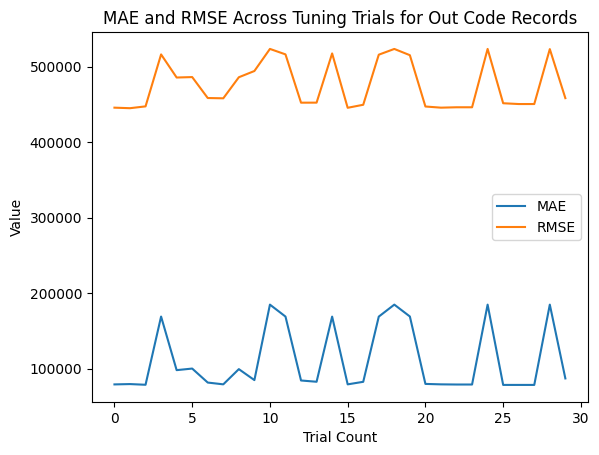

In [17]:
oc_trials_accuracy = pd.DataFrame()
oc_trials_accuracy["MAE"] = mae_oc_trials
oc_trials_accuracy["RMSE"] = rmse_oc_trials
fig1 = oc_trials_accuracy.plot(kind="line")
fig1.set_title("MAE and RMSE Across Tuning Trials for Out Code Records")
fig1.set_xlabel("Trial Count")
fig1.set_ylabel("Value")

Text(0, 0.5, 'Value')

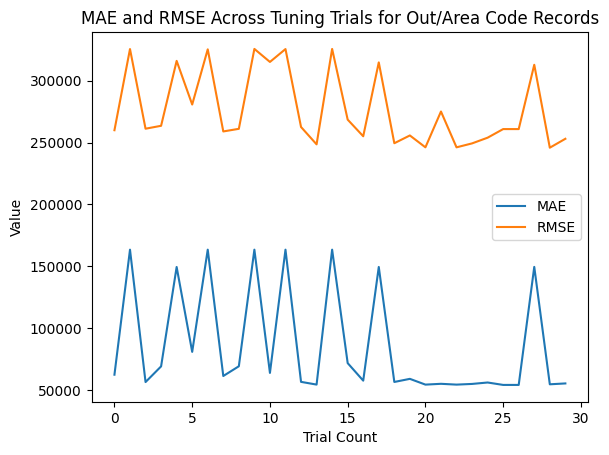

In [18]:
oac_trials_accuracy = pd.DataFrame()
oac_trials_accuracy["MAE"] = mae_oac_trials
oac_trials_accuracy["RMSE"] = rmse_oac_trials
fig1 = oac_trials_accuracy.plot(kind="line")
fig1.set_title("MAE and RMSE Across Tuning Trials for Out/Area Code Records")
fig1.set_xlabel("Trial Count")
fig1.set_ylabel("Value")

In [19]:
# Creating tuned models to check accuracy

# OC
oc_model = XGBRegressor(colsample_bytree=1, 
                     gamma=3, 
                     learning_rate=0.1, 
                     max_depth=12, 
                     reg_alpha=0.01, 
                     reg_lambda=0.01)

oc_model.fit(X_oc_train, y_oc_train)

oc_check = oc_model.predict(X_oc_test)

oc_mae = sklearn.metrics.mean_absolute_error(y_oc_test, oc_check)

print(oc_mae)

# OAC
oac_model = XGBRegressor(colsample_bytree=1, 
                     gamma=4, 
                     learning_rate=0.1, 
                     max_depth=15, 
                     reg_alpha=0.01, 
                     reg_lambda=0.1)

oac_model.fit(X_oac_train, y_oac_train)

oac_check = oac_model.predict(X_oac_test)

oac_mae = sklearn.metrics.mean_absolute_error(y_oac_test, oac_check)

print(oac_mae)

78310.28191885853
54197.054587547376


In [20]:
# Saving both models to be used for prediction
oc_filename = "Dumps/oc_xgbmp_model.sav"
oac_filename = "Dumps/oac_xgbm_model.sav"

pickle.dump(oc_model, open(oc_filename, "wb"))
pickle.dump(oac_model, open(oac_filename, "wb"))